In [1]:
import Base
import Parser.CircuitParserCalc as cpc
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

interactive(children=(FloatSlider(value=100.0, description='r0', max=200.0, step=1.0), FloatSlider(value=100.0…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
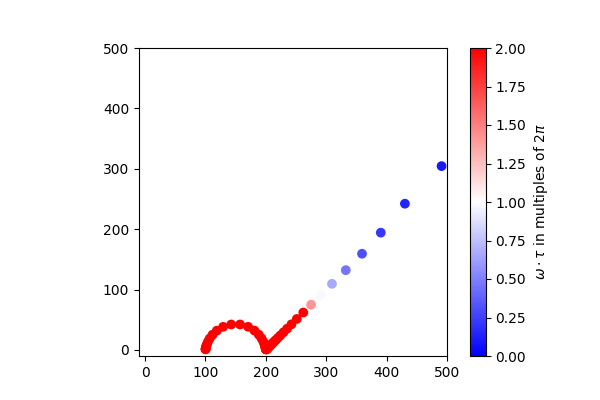

In [12]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)
cb = None
 
 
@widgets.interact(r0=(0.0, 200.0, 1.0), r1=(0.0, 200.0, 1.0), ws_r=(0.0, 400.0, 1.0), ws_t=(0.0, 5.0, 0.1), continuous_update=False)
def update(r0 = 100.0,r1 = 100, ws_r=100.0, ws_t=1.0,alpha=0.9):
    """Remove old lines from plot and plot new one"""
    fig.clear()
    ax = plt.gca()
    circuit = "R0-p(R1,CPE1)-Wss1"
    param = {
            "R0": r0,
            "R1": r1,
            "R2": 100,
            "CPE1_0": 1e-9,
            "CPE1_1": alpha,
            "Ws1_R": ws_r,
            "Ws1_T": 10 ** ws_t,
            "Wss1_R": ws_r,
            "Wss1_T": 10 ** ws_t
            }
    freq = np.logspace(-4, 9, 80)
    res = cpc.calc_circuit(param, circuit, freq)
    ax.clear()
    scat = ax.scatter(
                res.real,
                -res.imag,
                c=freq * param["Wss1_T"] / 2 / np.pi,
                cmap='bwr',
                vmin=0,
                vmax=2
                )
    fig.colorbar(scat, label=r"$\omega\cdot\tau$ in multiples of $2\pi$")
    ax.set_aspect('equal')
    ax.set_xlim(-10, 500)
    ax.set_ylim(ax.get_xlim())